# Slug test for confined aquifer
**This test is taken from example of MLU.**

In [1]:
%matplotlib inline
from ttim import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Set background prameters:

In [2]:
b = 98 #aquifer thickness
zt = -24
zb = zt - b
rw = 0.076 #well radius of Ln-2 Well
rc = 0.076 #casing radius of Ln-2 Well
Q = 0.01016 #slug volume in m^3

Load data:

In [3]:
data = np.loadtxt('data/dawsonville_slug.txt')
t = data[:, 0]
h = data[:, 1]

Create conceptual model:

In [4]:
ml = ModelMaq(kaq=10, z=[zt, zb], Saq=1e-4, tmin=1e-6, tmax=1e-3, topboundary='conf')
w = Well(ml, xw=0, yw=0, rw=rw, rc=rc, tsandQ=[(0, -Q)], layers=0, wbstype='slug')
ml.solve()

self.neq  1
solution complete


In [5]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq0', initial=10, pmin=0)
ca.set_parameter(name='Saq0', initial=1e-4)
ca.series(name='obs', x=0, y=0, layer=0, t=t, h=h)
ca.fit(report=True)

...............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 22
    # variables        = 2
    chi-square         = 4.2778e-04
    reduced chi-square = 2.1389e-05
    Akaike info crit   = -234.654964
    Bayesian info crit = -232.472879
[[Variables]]
    kaq0:  0.42082538 +/- 0.01841831 (4.38%) (init = 10)
    Saq0:  1.7028e-05 +/- 5.3141e-06 (31.21%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.985


In [6]:
display(ca.parameters)
print('rmse:', ca.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,0.420825,0.018418,4.37671,0,inf,10,[0.4208253798974495]
Saq0,1.70282e-05,0.000005,31.2075,-inf,inf,0.0001,[1.702822495188348e-05]


rmse: 0.004409577277491564


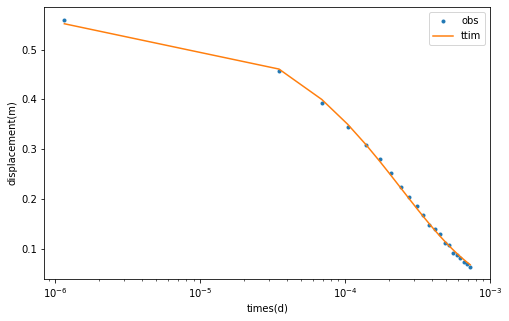

In [7]:
hm = ml.head(0, 0, t)
plt.figure(figsize=(8, 5))
plt.semilogx(t, h, '.', label='obs')
plt.semilogx(t, hm[0], label='ttim')
plt.xlabel('times(d)')
plt.ylabel('displacement(m)')
plt.legend();

Try multilayer model:

In [8]:
nlay = 49 #number of layers
zlayers = np.linspace(zt, zb, nlay + 1) #elevation of each layer
Saq = 1e-4 * np.ones(nlay)

In [9]:
ml_1 = Model3D(kaq=10, z=zlayers, Saq=Saq, tmin=1e-6, tmax=1e-3, phreatictop=True)
w_1 = Well(ml_1, xw=0, yw=0, rw=rw, rc=rc, tsandQ=[(0, -Q)], layers=range(nlay), wbstype='slug')
ml_1.solve()

self.neq  49
solution complete


In [10]:
ca_1 = Calibrate(ml_1)
ca_1.set_parameter(name='kaq0_48', initial=10, pmin=0)
ca_1.set_parameter(name='Saq0_48', initial=1e-4)
ca_1.series(name='obs', x=0, y=0, layer=range(nlay), t=t, h=h)
ca_1.fit(report=True)

................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 1078
    # variables        = 2
    chi-square         = 0.02094373
    reduced chi-square = 1.9464e-05
    Akaike info crit   = -11690.9837
    Bayesian info crit = -11681.0180
[[Variables]]
    kaq0_48:  0.42040768 +/- 0.00252667 (0.60%) (init = 10)
    Saq0_48:  1.7362e-05 +/- 7.4494e-07 (4.29%) (init = 0.0001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_48, Saq0_48) = -0.986


In [11]:
display(ca_1.parameters)
print('RMSE:', ca_1.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_48,0.420408,2.526675e-03,0.601006,0,inf,10,"[0.4204076783911592, 0.4204076783911592, 0.420..."
Saq0_48,1.73621e-05,7.449361e-07,4.29058,-inf,inf,0.0001,"[1.7362144857462076e-05, 1.7362144857462076e-0..."


RMSE: 0.0044077564143741275


Simulate test site with multilayer model does not improve the performance much.

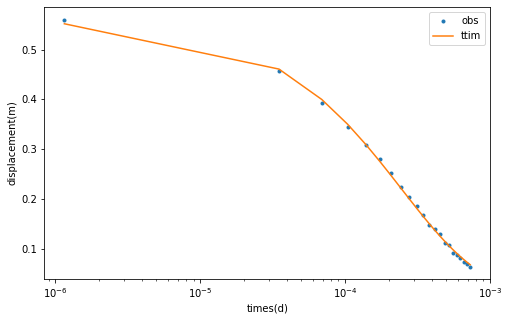

In [12]:
hm_1 = ml_1.head(0, 0, t)
plt.figure(figsize=(8, 5))
plt.semilogx(t, h, '.', label='obs')
plt.semilogx(t, hm_1[0], label='ttim')
plt.xlabel('times(d)')
plt.ylabel('displacement(m)')
plt.legend();

Try if well screen resistance has an effect:

In [13]:
ml_2 = Model3D(kaq=10, z=zlayers, Saq=Saq, tmin=1e-6, tmax=1e-3, phreatictop=True)
w_2 = Well(ml_2, xw=0, yw=0, rw=rw, rc=rc, res=0.1, tsandQ=[(0, -Q)], \
           layers=range(nlay), wbstype='slug')
ml_2.solve()

self.neq  49
solution complete


In [14]:
ca_2 = Calibrate(ml_2)
ca_2.set_parameter(name='kaq0_48', initial=10, pmin=0)
ca_2.set_parameter(name='Saq0_48', initial=1e-4)
ca_2.set_parameter_by_reference(name='res', parameter=w_2.res, initial=0)
ca_2.series(name='obs', x=0, y=0, layer=range(nlay), t=t, h=h)
ca_2.fit(report=True)

................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 173
    # data points      = 1078
    # variables        = 3
    chi-square         = 0.19769058
    reduced chi-square = 1.8390e-04
    Akaike info crit   = -9269.02034
    Bayesian info crit = -9254.07175
[[Variables]]
    kaq0_48:  1.46245727 +/- 0.00987825 (0.68%) (init = 10)
    Saq0_48:  1.0961e-13 +/- 1.8626e-14 (16.99%) (init = 0.0001)
    res:      0.02337981 +/- 0.00160953 (6.88%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0_48, Saq0_48) = -0.910
    C(Saq0_48, res)     = -0.184
    C(kaq0_48, res)     =  0.121


In [15]:
display(ca_2.parameters)
print('RMSE:', ca_2.rmse())

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0_48,1.46246,9.878247e-03,0.675455,0,inf,10,"[1.4624572716235917, 1.4624572716235917, 1.462..."
Saq0_48,1.09612e-13,1.862630e-14,16.993,-inf,inf,0.0001,"[1.0961177230839196e-13, 1.0961177230839196e-1..."
res,0.0233798,1.609533e-03,6.88429,-inf,inf,0,[0.02337980518372843]


RMSE: 0.013542024721293677


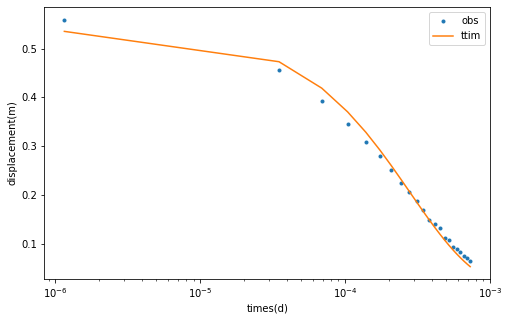

In [16]:
hm_2 = ml_2.head(0, 0, t)
plt.figure(figsize=(8, 5))
plt.semilogx(t, h, '.', label='obs')
plt.semilogx(t, hm_2[0], label='ttim')
plt.xlabel('times(d)')
plt.ylabel('displacement(m)')
plt.legend();

Adding resistance of well screen does not improve the performance. Thus, res should not be applied in the conceptual model.

## Summary of values presented by MLU

In [17]:
t = pd.DataFrame(columns=['k [m/d]', 'Ss [1/m]'], \
                 index = ['MLU', 'ttim', 'ttim-multilayer', 'ttim-res'])
tr = np.delete(ca_2.parameters['optimal'].values, 2)
t.loc['MLU'] = [0.4133, 1.9388E-05]
t.loc['ttim'] = ca.parameters['optimal'].values
t.loc['ttim-multilayer'] = ca_1.parameters['optimal'].values
t.loc['ttim-res'] = tr
t['RMSE'] = [0.004264, ca.rmse(), ca_1.rmse(), ca_2.rmse()]
t

,k [m/d],Ss [1/m],RMSE
MLU,0.4133,1.9388e-05,0.004264
ttim,0.420825,1.70282e-05,0.004410
ttim-multilayer,0.420408,1.73621e-05,0.004408
ttim-res,1.46246,1.09612e-13,0.013542
